In [2]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.misc import derivative

# Symbolic Case

**Example:** $$f(x) = e^{-a\sin(x^2)}\cdot \sin(b^x) \cdot \ln(c\sin^2(x)/x)$$

In [4]:
x,a,b,c=smp.symbols("x a b c",real=True)
f=smp.exp(-a*smp.sin(x**2))*smp.sin(b**x)*smp.log(c*smp.sin(x)**2/x)
f

exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)

In [8]:
x=smp.symbols("x",real=True)
b=smp.sin(x)**2
b
dbdx=smp.diff(b,x)
dbdx

2*sin(x)*cos(x)

In [6]:
dfdx=smp.diff(f,x)#f türevini alıcağımız fonksiyon x de neye baglı olarak aldıgımız.
dfdx

-2*a*x*exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)*cos(x**2) + b**x*exp(-a*sin(x**2))*log(b)*log(c*sin(x)**2/x)*cos(b**x) + x*(2*c*sin(x)*cos(x)/x - c*sin(x)**2/x**2)*exp(-a*sin(x**2))*sin(b**x)/(c*sin(x)**2)

In [7]:
df2dx2=smp.diff(f,x,2)#Kaç kere alınacağını da söyliyebiliriz.
df2dx2

(-4*a*b**x*x*log(b)*log(c*sin(x)**2/x)*cos(b**x)*cos(x**2) - 4*a*x*(2*cos(x) - sin(x)/x)*sin(b**x)*cos(x**2)/sin(x) + 2*a*(2*a*x**2*cos(x**2)**2 + 2*x**2*sin(x**2) - cos(x**2))*log(c*sin(x)**2/x)*sin(b**x) - b**x*(b**x*sin(b**x) - cos(b**x))*log(b)**2*log(c*sin(x)**2/x) + 2*b**x*(2*cos(x) - sin(x)/x)*log(b)*cos(b**x)/sin(x) - (2*(2*cos(x) - sin(x)/x)*cos(x)/sin(x) + 2*(sin(x)**2 - cos(x)**2 + 2*sin(x)*cos(x)/x - sin(x)**2/x**2)/sin(x) - (2*cos(x) - sin(x)/x)/x)*sin(b**x)/sin(x))*exp(-a*sin(x**2))

In [8]:
df2dx2.subs([(x,4),(a,1),(b,2),(c,3)]).evalf()#Burda sayısal değerler vererek çözdük.

116.239800708873

In [17]:
df2dx2_f=smp.lambdify((x,a,b,c),df2dx2)
x=np.linspace(1,2,100)
y=df2dx2_f(x,a=1,b=2,c=3)#lambdify sayesinde grafik çizicek hale getirdik.

SyntaxError: cannot assign to literal (<lambdifygenerated-5>, line 2)

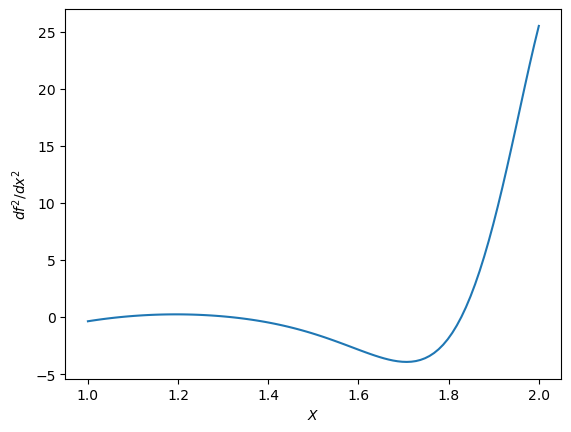

In [20]:
plt.plot(x,y)
plt.xlabel("$X$")
plt.ylabel("$df^2/dx^2$");

# NUMERİCAL CASE

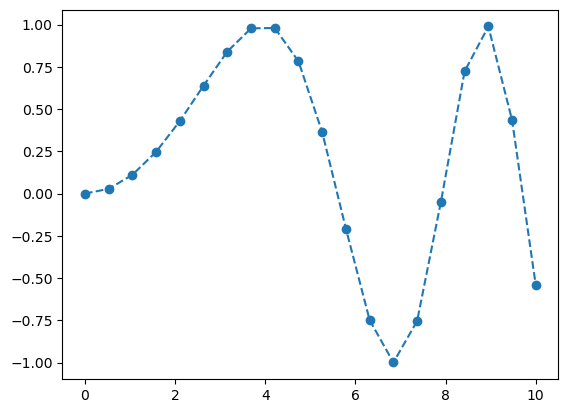

In [25]:
x,y=np.loadtxt("C:\\Users\\ILKAY\\Desktop\\sample_data1.txt")
plt.plot(x,y,"o--");

In [26]:
dydx=np.gradient(y,x)

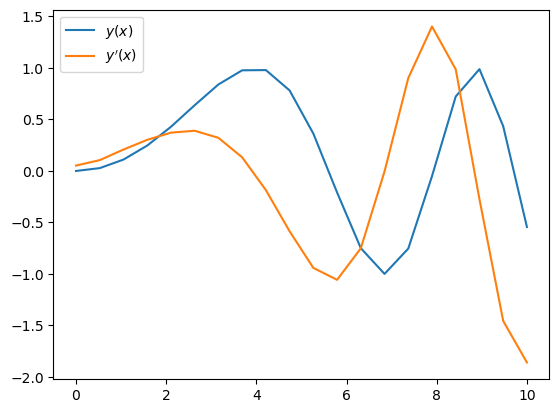

In [29]:
plt.plot(x,y,label="$y(x)$")
plt.plot(x,dydx,label="$y\'(x)$")
plt.legend();

In [30]:
x,y=np.loadtxt("C:\\Users\\ILKAY\\Downloads\\sample_data2.txt")

In [31]:
dydx=np.gradient(y,x)

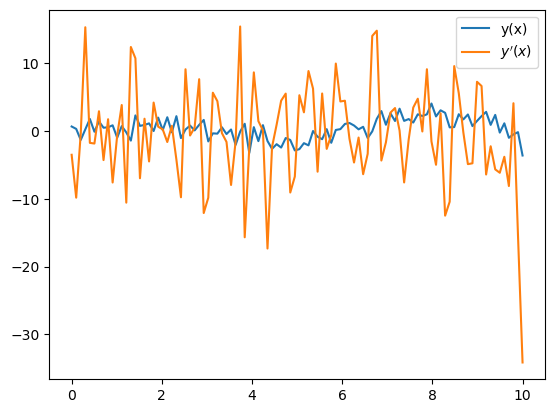

In [34]:
plt.plot(x,y,label="y(x)")
plt.plot(x,dydx,label="$y\'(x)$")
plt.legend()

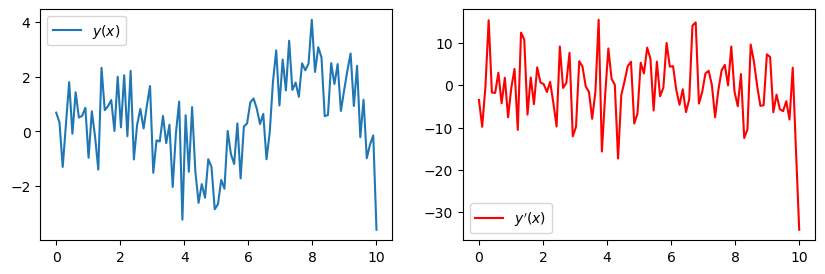

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(x,y, label='$y(x)$')
ax[1].plot(x,dydx, label='$y\'(x)$', color='r')
[a.legend() for a in ax]
plt.show()

# Quasi-Symbolic Case

Eğer fonksiyon tipik bir biçimde verilmiyosa bu durum vardır.Örneğin 
$$f(u) = \text{max} \left\{ \left|e^{-x_iu^2} - y_i\right| \right\}  $$

for some array of $x_i$'s and $y_i$'s

In [36]:
x=np.linspace(0,1,500)
y = np.exp(-x*2.15**2) + 0.1*np.random.randn(len(x))

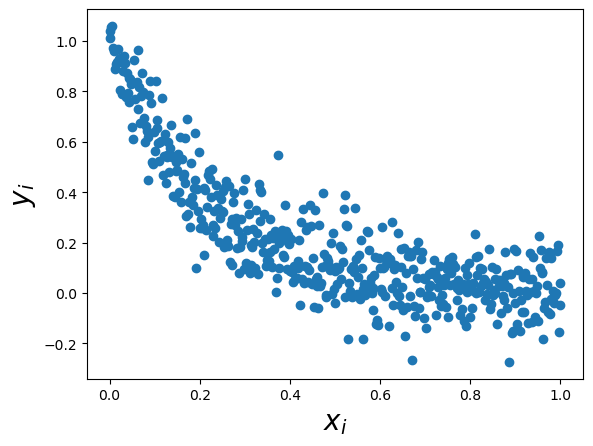

In [39]:
plt.scatter(x,y)#grafiği nokta şeklinde veriyor.
plt.xlabel('$x_i$', fontsize=20)
plt.ylabel('$y_i$', fontsize=20);

In [3]:
a=np.array([[1,0],[2,0]])
b=np.array([[1,0],[2,0]])